In [63]:
import pandas as pd

seasons = [1516, 1617, 1718, 1819, 1920, 2021]
seasons_2 = [20152016, 20162017, 20172018, 20182019, 20192020, 20202021]
results_list = []

for i in range(len(seasons)):
  matches_df = pd.read_csv(f"./datasets/matches/epl_matches_{seasons_2[i]}.csv")
  softmax_df = pd.read_csv(f"./betting_simulation/new_probabilities/{seasons[i]}.csv")
  softmax_old_df = pd.read_csv(f"./betting_simulation/original_probabilities/{seasons[i]}.csv")
  softmax_old_df = softmax_old_df.rename(columns={'home_prob_softmax': 'home_prob_softmax_old'})
  combined_df = pd.merge(matches_df, softmax_df, on="match_url")
  combined_df = pd.merge(combined_df, softmax_old_df, on="match_url")
  combined_df['home_prob_softmax'] = combined_df['home_prob_softmax'] > 0.5
  combined_df['home_prob_softmax'] = combined_df['home_prob_softmax'].astype(int)
  combined_df['home_prob_softmax_old'] = combined_df['home_prob_softmax_old'] > 0.5
  combined_df['home_prob_softmax_old'] = combined_df['home_prob_softmax_old'].astype(int)
  results_df = pd.DataFrame()
  results_df['match_url'] = combined_df['match_url']
  results_df[f'{seasons[i]}_home_softmax'] = combined_df['home_prob_softmax']
  results_df[f'{seasons[i]}_home_wins'] = combined_df['home_goals'] / combined_df['away_goals'] > 1.0
  results_df[f'{seasons[i]}_home_wins'] = results_df[f'{seasons[i]}_home_wins'].astype(int)
  results_df[f'{seasons[i]}_away_wins'] = combined_df['home_goals'] / combined_df['away_goals'] < 1.0
  results_df[f'{seasons[i]}_away_wins'] = results_df[f'{seasons[i]}_away_wins'].astype(int)
  results_df[f'{seasons[i]}_draws'] = combined_df['home_goals'] / combined_df['away_goals'] == 1.0
  results_df[f'{seasons[i]}_draws'] = results_df[f'{seasons[i]}_draws'].astype(int)
  results_df['home_prob_softmax_old'] = combined_df['home_prob_softmax_old']
  results_list.append({
      'season': seasons[i],
      'actual_home_wins': results_df[f'{seasons[i]}_home_wins'].sum(),
      'new_home_wins': results_df[f'{seasons[i]}_home_softmax'].sum(),
      'old_home_wins': results_df['home_prob_softmax_old'].sum(),
      'draws': results_df[f'{seasons[i]}_draws'].sum(),
      'results_df': results_df,
  })

# print(results_list)


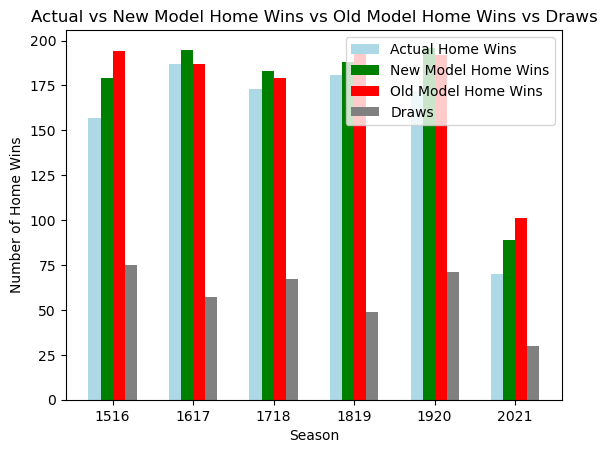

In [64]:
import matplotlib.pyplot as plt

seasons = [str(r['season']) for r in results_list]
actual_home_wins = [r['actual_home_wins'] for r in results_list]
new_home_wins = [r['new_home_wins'] for r in results_list]
old_home_wins = [r['old_home_wins'] for r in results_list]
draws = [r['draws'] for r in results_list]

# Set the width of the bars
bar_width = 0.15

# Set the positions of the bars on the x-axis
r1 = range(len(seasons))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Create the actual and predicted bars
plt.bar(r1, actual_home_wins, color='lightblue', width=bar_width, label='Actual Home Wins')
plt.bar(r2, new_home_wins, color='green', width=bar_width, label='New Model Home Wins')
plt.bar(r3, old_home_wins, color='red', width=bar_width, label='Old Model Home Wins')
plt.bar(r4, draws, color='grey', width=bar_width, label='Draws')

# Add x-axis ticks and labels
plt.xticks([r + bar_width/2 for r in r2], seasons)

# Add axis labels and title
plt.xlabel('Season')
plt.ylabel('Number of Home Wins')
plt.title('Actual vs New Model Home Wins vs Old Model Home Wins vs Draws')

# Add legend
plt.legend()

# Show the plot
plt.show()



In [67]:
import pandas as pd

seasons = [1516, 1617, 1718, 1819, 1920, 2021]
seasons_2 = [20152016, 20162017, 20172018, 20182019, 20192020, 20202021]
old_data, new_data = [], []
for i in range(len(seasons)):
  matches_df = pd.read_csv(f"./datasets/matches/epl_matches_{seasons_2[i]}.csv")
  softmax_df = pd.read_csv(f"./betting_simulation/new_probabilities/{seasons[i]}.csv")
  softmax_old_df = pd.read_csv(f"./betting_simulation/original_probabilities/{seasons[i]}.csv")
  softmax_old_df = softmax_old_df.rename(columns={'home_prob_softmax': 'home_prob_softmax_old'})
  combined_df = pd.merge(matches_df, softmax_df, on="match_url")
  combined_df = pd.merge(combined_df, softmax_old_df, on="match_url")
  combined_df['actual_home_wins'] = combined_df['home_goals'] / combined_df['away_goals'] > 1.0
  combined_df['actual_away_wins'] = combined_df['home_goals'] / combined_df['away_goals'] < 1.0
  combined_df['actual_draws'] = combined_df['home_goals'] / combined_df['away_goals'] == 1.0
  combined_df['old_vs_actual_home_wins'] = (combined_df['home_prob_softmax_old'] > 0.5) == combined_df['actual_home_wins']
  combined_df['old_vs_actual_away_wins'] = (combined_df['home_prob_softmax_old'] < 0.5) == combined_df['actual_away_wins']
  combined_df['old_vs_actual_draws'] = (combined_df['home_prob_softmax_old'] == 0.5) == combined_df['actual_draws']
  combined_df['new_vs_actual_home_wins'] = (combined_df['home_prob_softmax'] > 0.5) == combined_df['actual_home_wins']
  combined_df['new_vs_actual_away_wins'] = (combined_df['home_prob_softmax'] < 0.5) == combined_df['actual_away_wins']
  combined_df['new_vs_actual_draws'] = (combined_df['home_prob_softmax'] == 0.5) == combined_df['actual_draws']

  # Get the fraction of true values in the old_vs_actual_home_wins column
  old_vs_actual_home_wins = combined_df['old_vs_actual_home_wins'].mean() * 100
  old_vs_actual_away_wins = combined_df['old_vs_actual_away_wins'].mean() * 100
  old_vs_actual_draws = combined_df['old_vs_actual_draws'].mean() * 100
  new_vs_actual_home_wins = combined_df['new_vs_actual_home_wins'].mean() * 100
  new_vs_actual_away_wins = combined_df['new_vs_actual_away_wins'].mean() * 100
  new_vs_actual_draws = combined_df['new_vs_actual_draws'].mean() * 100
  print(f"{seasons[i]}", old_vs_actual_home_wins, old_vs_actual_away_wins, old_vs_actual_draws)
  old_data.append((seasons[i], old_vs_actual_home_wins, old_vs_actual_away_wins, old_vs_actual_draws))
  print(f"{seasons[i]}", new_vs_actual_home_wins, new_vs_actual_away_wins, new_vs_actual_draws)
  new_data.append((seasons[i], new_vs_actual_home_wins, new_vs_actual_away_wins, new_vs_actual_draws))


1516 57.10526315789474 56.315789473684205 80.26315789473685
1516 45.26315789473684 49.73684210526316 80.26315789473685
1617 59.473684210526315 60.0 85.0
1617 52.10526315789473 51.05263157894737 85.0
1718 57.89473684210527 55.52631578947368 82.36842105263158
1718 45.78947368421053 47.10526315789474 82.36842105263158
1819 66.05263157894737 68.42105263157895 87.10526315789474
1819 42.368421052631575 41.05263157894737 87.10526315789474
1920 61.05263157894737 61.05263157894737 81.3157894736842
1920 50.0 48.68421052631579 81.57894736842105
2021 66.84782608695652 64.13043478260869 83.69565217391305
2021 45.108695652173914 47.82608695652174 83.69565217391305


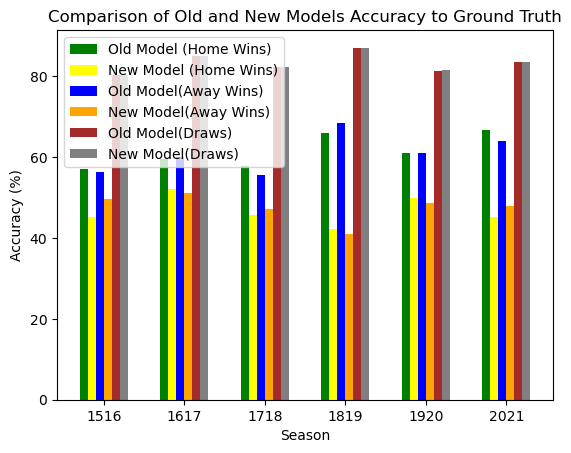

In [85]:
import matplotlib.pyplot as plt

# Set the width of the bars
bar_width = 0.1

# Set the positions of the bars on the x-axis
r1 = range(len(old_data))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]
r6 = [x + bar_width for x in r5]

# Create the old and new bars
plt.bar(r1, [d[1] for d in old_data], color='green', width=bar_width, label='Old Model (Home Wins)')
plt.bar(r2, [d[1] for d in new_data], color='yellow', width=bar_width, label='New Model (Home Wins)')
plt.bar(r3, [d[2] for d in old_data], color='blue', width=bar_width, label='Old Model(Away Wins)')
plt.bar(r4, [d[2] for d in new_data], color='orange', width=bar_width, label='New Model(Away Wins)')
plt.bar(r5, [d[3] for d in old_data], color='brown', width=bar_width, label='Old Model(Draws)')
plt.bar(r6, [d[3] for d in new_data], color='grey', width=bar_width, label='New Model(Draws)')

# Add x-axis ticks and labels
plt.xticks([r + bar_width/2 for r in r3], [d[0] for d in old_data])

# Add axis labels and title
plt.xlabel('Season')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Old and New Models Accuracy to Ground Truth')

# # Add legend
# plt.legend()

# Show the plot
plt.show()
